In [1]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image

from tqdm.notebook import tqdm

from utils_analysis import *
import torch
from torch.utils.data import DataLoader
import cv2
from skimage import data

In [2]:
plt.rcParams["font.family"] = "Arial" 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams["svg.fonttype"] = "none"

In [3]:
training_methods = ["dino", "supervised"] 
depth_list = [8, 12]
num_models = 6
num_top = 5

In [4]:
imagenet_path = np.array(sorted(glob.glob("../dataset/imagenet_samples_vals/*.JPEG")))
#img_order = [17, 16, 10, 9, 8, 7, 11, 15, 6, 1, 4, 0, 3, 2, 12, 13, 5, 14]
#imagenet_path = imagenet_path[img_order]

In [5]:
imgs = []
# imagenet
for path in imagenet_path:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    imgs.append(img)    

num_imgs = len(imgs)

In [6]:
attn_dict = np.load("../results/dino_vit_attention_groups_animals.npz", allow_pickle=True)

In [7]:
attn_concat = np.vstack([attn_dict[str(depth)].reshape(72, num_imgs, -1) for depth in depth_list])
attn_concat_flat = attn_concat.reshape(144, num_imgs, -1)

In [8]:
attn_concat_flat.shape

(144, 10, 256)

In [9]:
labels = np.load("../results/attn_best_label_N2010.npy")

In [10]:
np.unique(labels, return_counts=True)

(array([1, 2, 3], dtype=int32), array([24, 28, 92]))

In [11]:
attns = []
for i in range(1, 4):
    idx = np.where(labels == i)[0]
    attn = np.mean(attn_concat_flat[idx].reshape(-1, num_imgs, 16, 16), axis=0)
    attns.append(attn)

In [12]:
labels[36]

1

In [13]:
#attn_layer = attn_concat_flat[36].reshape(-1, 16, 16)
#attn_layer = attn_concat_flat[134].reshape(-1, 16, 16)
attn_layer = attn_concat_flat[42].reshape(-1, 16, 16)

In [14]:
attn_concat_flat.shape

(144, 10, 256)

In [15]:
attn_layer.shape

(10, 16, 16)

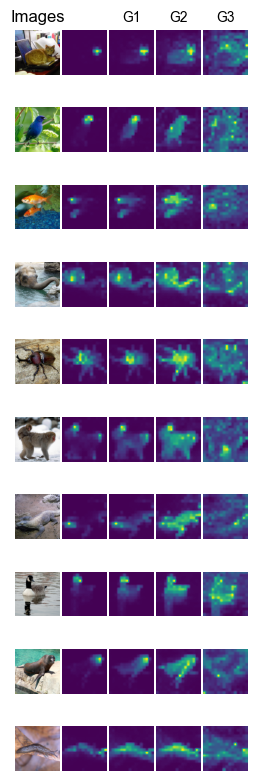

In [16]:
fig, axes = plt.subplots(num_imgs, 5, figsize=(3, 10))#, tight_layout=True)
for i in range(num_imgs):
    axes[i, 0].imshow(imgs[i])
    #axes[i, 0].set_ylabel(str(i))
    axes[i, 1].imshow(attn_layer[i])
    for jj, j in enumerate([0, 2, 1]):
        axes[i, 2+jj].imshow(attns[j][i])
for i in range(num_imgs):
    for j in range(5):
        axes[i, j].axis("off")
axes[0, 0].set_title("Images")
for j in range(3):
    axes[0, 2+j].set_title(f"G{j+1}", fontsize=10)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle(f"DINO ViT-{depth}, layer #{d_idx+1}, model #{m_idx+1}")
#plt.tight_layout()
fig.savefig(f"../figures/example_attention_maps_animals_group_head.svg", dpi=300)